# Weather Statistical Sampling
-uses historical data to create pdfs for sampling

In [7]:
import pandas as pd
import numpy as np
import os
from os.path import dirname
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import spatial
import scipy


hourly_precip_lookup = ["/Sufficiency_Testing/weather_data/hourly/precipitation/recent/", "final_hourly_compiled.csv"]
hourly_air_lookup =  ["/Sufficiency_Testing/weather_data/hourly/air_temperature/recent/", "hourly_air_temp_compiled.csv"]

# absolute directory
d = os.path.dirname(os.getcwd())

# relative directory
file_path = "/data/generated_data1.csv"

# Creates a dataframe for processing the data

In [8]:
hourly_air_temp_df = pd.read_csv(d+hourly_air_lookup[0] + 
                                 hourly_air_lookup[1], 
                                 ";")
len(hourly_air_temp_df)

6595384

In [9]:
hourly_air_temp_df.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor5300,2017102000,3,16.3,65.0,eor
0,5300,2017102001,3,15.8,68.0,eor,NaN,NaN,NaN,NaN,NaN
1,5300,2017102002,3,16.8,53.0,eor,NaN,NaN,NaN,NaN,NaN
2,5300,2017102003,3,16.6,58.0,eor,NaN,NaN,NaN,NaN,NaN
3,5300,2017102004,3,15.4,68.0,eor,NaN,NaN,NaN,NaN,NaN
4,5300,2017102005,3,14.9,71.0,eor,NaN,NaN,NaN,NaN,NaN


In [10]:
hourly_air_temp_df['formattedTime'] = pd.to_datetime(hourly_air_temp_df['MESS_DATUM'].astype(str), format='%Y%m%d%H', errors='ignore')
hourly_air_temp_df['month'] = pd.to_datetime(hourly_air_temp_df['formattedTime']).dt.strftime('%m')

In [11]:
hourly_air_temp_df["month"] = hourly_air_temp_df.month.astype(float)
hourly_air_temp_df = hourly_air_temp_df[hourly_air_temp_df['TT_TU'] != -999]

In [12]:
hourly_air_temp_df.to_csv(d+hourly_air_lookup[0] + "final_hourly_compiled.csv")
#hourly_air_temp_df[(np.abs(stats.zscore(hourly_air_temp_df)) < 3).all(axis=1)]
#hourly_air_temp_df = hourly_air_temp_df[((hourly_air_temp_df['TT_TU'] - hourly_air_temp_df['TT_TU'].mean()) / hourly_air_temp_df['TT_TU'].std()).abs() < 3]

In [13]:
hourly_precip = pd.read_csv(d+hourly_precip_lookup[0] + 
                                 hourly_precip_lookup[1], 
                                 ";")

In [15]:
print(hourly_precip.head())
len(hourly_precip)
#print(hourly_precip.columns)

  STATIONS_ID   MESS_DATUM   QUALITAETS_NIVEAU   NIEDERSCHLAG_GEFALLEN_IND  \
0         985   2016043001                   3                           0   
1         985   2016043002                   3                           0   
2         985   2016043003                   3                           0   
3         985   2016043004                   3                           0   
4         985   2016043005                   3                           0   

   NIEDERSCHLAGSHOEHE  NIEDERSCHLAGSFORM eor985  2016043000   3   0  0.0  \
0                 0.0               -999    eor         NaN NaN NaN  NaN   
1                 0.0               -999    eor         NaN NaN NaN  NaN   
2                 0.0               -999    eor         NaN NaN NaN  NaN   
3                 0.0               -999    eor         NaN NaN NaN  NaN   
4                 0.0               -999    eor         NaN NaN NaN  NaN   

   -999  eor  
0   NaN  NaN  
1   NaN  NaN  
2   NaN  NaN  
3   NaN  NaN  

In [16]:
hourly_precip['formattedTime'] = pd.to_datetime(hourly_precip[' MESS_DATUM'].astype(str), format='%Y%m%d%H', errors='ignore')
hourly_precip['month'] = pd.to_datetime(hourly_precip['formattedTime']).dt.strftime('%m')
hourly_precip["month"] = hourly_precip.month.astype(float)
hourly_precip = hourly_precip[hourly_precip['NIEDERSCHLAGSHOEHE'] != -999]


In [ ]:
hourly_precip.to_csv(d+hourly_precip_lookup[0] + "final_hourly_compiled.csv")

# Creates a Monthly distribution based on the data present 
-- checks that the sample is normal 

-- groups by month 

-- and allows sampling by point

In [31]:
class BuildMonthlyDistribution():
    
    def __init__(self, df, month, lookup_key, station_id=None):
        self.df = df
        self.month = month 
        self.station_id = station_id
        self.outlier_constant = 1
        self.lookup_key = lookup_key
        self.subsample = self.subsample_dataframe(self.df, self.month, self.station_id, self.lookup_key)


    def subsample_dataframe(self, df, month, station_id, lookup_key):
        if station_id:
            return df.loc[(df['month'] == month) & (df['STATIONS_ID'] == station_id)][lookup_key]
        return df.loc[(df['month'] == month)][lookup_key]  
    
    
    def remove_outliers(self, subsample, outlierConstant):
        a = np.array(subsample)
        upper_quartile = np.percentile(a, 75)
        lower_quartile = np.percentile(a, 25)
        IQR = (upper_quartile - lower_quartile) * outlierConstant
        quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
        resultList = []
        for y in a.tolist():
            if y >= quartileSet[0] and y <= quartileSet[1]:
                resultList.append(y)
        return resultList
    
    
    def verify_distribution(self, subsample):
        k2, p = scipy.stats.normaltest(subsample)
        alpha = 1e-3
        print("p = {:g}".format(p))
        p = 3.27207e-11
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print("Normal distribution ")
        return
    
    def accept_probability_value(self, subsample, test_value, p_value):
        std = (np.std(subsample))
        mean = (np.mean(subsample))
        
        probability = scipy.stats.norm.pdf(test_value,mean,std)
        
        print(p_value)
        print(probability)
        if p_value < probability:
            return True
        return False
    
    def build_probability_list(self, subsample, value_ranges):
        std = (np.std(subsample))
        mean = (np.mean(subsample))
        print("MEAN: {} & STD: {}".format(mean, std))
        print(mean)
        list_of_prob = list()
        for i in range(value_ranges[0], value_ranges[1]):
            prob = scipy.stats.norm.pdf(i,mean,std)
            list_of_prob.append([i, prob])
        return list_of_prob
    
    def calculate_mean_std(self, subsample):
        return [np.mean(subsample), np.std(subsample)]
    
    


# AIRTEMP

In [20]:
df_precip = pd.read_csv(d+hourly_precip_lookup[0] + 
                 "final_hourly_compiled.csv")
print(len(df_precip))

5952738


In [32]:
title = "Precip All Stations"
proba_by_month = {"1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[], "10":[], "11":[], "12":[], 
                  "mean":"", "std":"" }
value_ranges = [0,70]

for i in range(1,13):
    c = BuildMonthlyDistribution(hourly_precip, i, 'NIEDERSCHLAGSHOEHE')
    probability = c.build_probability_list(c.subsample, value_ranges)
    proba_by_month[str(i)] = probability
    stat_points = c.calculate_mean_std(c.subsample)
    proba_by_month['mean'] = stat_points[0]
    proba_by_month['std'] = stat_points[1]
    #proba_by_month.append(probability)
print(proba_by_month)

MEAN: 0.06023651218064201 & STD: 0.24584172684836963
0.06023651218064201
MEAN: 0.06635851877637822 & STD: 0.302229149220761
0.06635851877637822
MEAN: 0.08023113782384222 & STD: 0.34623506033848184
0.08023113782384222
MEAN: 0.058468443431602374 & STD: 0.29794267173536454
0.058468443431602374
MEAN: 0.0882293876316891 & STD: 0.6142313685122998
0.0882293876316891
MEAN: 0.14133443235527932 & STD: 0.8753019609154024
0.14133443235527932
MEAN: 0.135769563730973 & STD: 0.8367158369795596
0.135769563730973
MEAN: 0.09154743051303707 & STD: 0.6159848032187585
0.09154743051303707
MEAN: 0.07535373693662102 & STD: 0.475894714730517
0.07535373693662102
MEAN: 0.09064456616774144 & STD: 0.40470644853295945
0.09064456616774144
MEAN: 0.07963306343460826 & STD: 0.3239123900804429
0.07963306343460826
MEAN: 0.03452234918500439 & STD: 0.19417260620235904
0.03452234918500439
{'1': [[0, 1.574772838697867], [1, 0.001089381683697654], [2, 4.9133248288869804e-14], [3, 1.4447880465504655e-31], [4, 2.769912545460566

# PRECIP

In [ ]:
df = pd.read_csv(d+hou[0] + 
                 "final_hourly_compiled.csv")

title_precip = "Air temp All Stations"
proba_by_month = {"1":[], "2":[], "3":[], "4":[], "5":[], "6":[], "7":[], "8":[], "9":[], "10":[], "11":[], "12":[], 
                  "mean":"", "std":"" }

for i in range(1,13):
    c = BuildMonthlyDistribution(df, i, 'TT_TU')
    probability = c.build_probability_list(c.subsample)
    proba_by_month[str(i)] = probability
    stat_points = c.calculate_mean_std(c.subsample)
    proba_by_month['mean'] = stat_points[0]
    proba_by_month['std'] = stat_points[1]

In [38]:
print(proba_by_month)

{'1': [[-30, 1.2897633949705243e-15], [-29, 9.171893668732034e-15], [-28, 6.129726854910018e-14], [-27, 3.849961447974487e-13], [-26, 2.2725046777172287e-12], [-25, 1.2606262261901954e-11], [-24, 6.572052697002482e-11], [-23, 3.219948185329196e-10], [-22, 1.4826200748990106e-09], [-21, 6.415699530935416e-09], [-20, 2.609103475217032e-08], [-19, 9.971758159687492e-08], [-18, 3.5816679288779397e-07], [-17, 1.209015993744654e-06], [-16, 3.835411101230135e-06], [-15, 1.1434704418410158e-05], [-14, 3.203842156669382e-05], [-13, 8.43626915790822e-05], [-12, 0.0002087674998059816], [-11, 0.0004855215376236782], [-10, 0.0010611756025417627], [-9, 0.0021797122264113613], [-8, 0.004207694602470561], [-7, 0.00763347712492652], [-6, 0.013014687754397949], [-5, 0.020853465825317444], [-4, 0.03140189688342855], [-3, 0.044439244666524505], [-2, 0.05910314634644105], [-1, 0.07387333073149116], [0, 0.08677565628469436], [1, 0.09579465557961934], [2, 0.09938430399819312], [3, 0.09690082352004396], [4, 0

383
MEAN: 20.056612264590406 & STD: 5.223453736078818
20.056612264590406


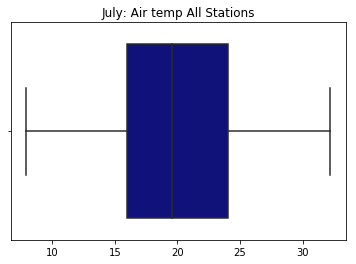

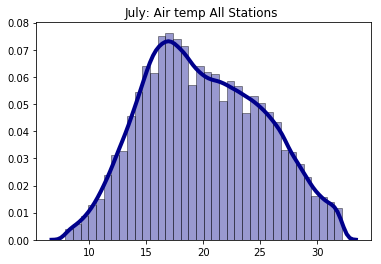

In [100]:
%matplotlib inline
month = 7

df = pd.read_csv(d+hourly_air_lookup[0] + "final_hourly_compiled.csv")
title = "Air temp All Stations"
c= BuildMonthlyDistribution(pd, month)
probability = c.build_probability_list(c.subsample)

import seaborn as sns
sns.boxplot(x=c.subsample, color = 'darkblue').set_title("July: {}".format(title) )
plt.show()

sns.distplot(pd.to_numeric(c.subsample), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("July: {} ".format(title))
plt.show()


In [102]:
print(c.accept_probability_value(c.subsample, 2,0.05))

0.05
0.00019413672756221276
False


5371
MEAN: 17.56382681564246 & STD: 4.204920819527854
17.56382681564246


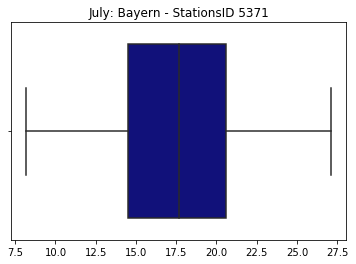

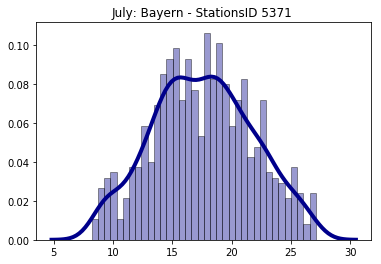

In [111]:
%matplotlib inline
month = 7
stations_id= 5371

title = "Bayern - StationsID {}".format(stations_id)
c= BuildMonthlyDistribution(hourly_air_temp_df, month, stations_id)
probability = c.build_probability_list(c.subsample)

import seaborn as sns
sns.boxplot(x=c.subsample, color = 'darkblue').set_title("July: {}".format(title) )
plt.show()

sns.distplot(pd.to_numeric(c.subsample), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("July: {} ".format(title))
plt.show()

In [ ]:
from scipy.stats import norm


sns.set()


def p(x):
    return st.norm.pdf(x)


def q(x):
    return st.norm.cdf(x)



#print(sorted(x))


k = max(p(x) / q(x))


def rejection_sampling(iter=1000):
    samples = []
    
    random_sm = [-40, -50]

    for i in random_sm:
        z = i
        u = np.random.uniform(0, k*q(z))
        #print(u)
        if u <= p(z):
            samples.append(z)

    return np.array(samples)


if __name__ == '__main__':
    
    df_subsample = hourly_air_temp_df.loc[(hourly_air_temp_df['month'] == 3) 
                                          & (hourly_air_temp_df['STATIONS_ID'] == 5300)]
    x = (df_subsample['TT_TU'])
    hist = df_subsample.hist(column="TT_TU", bins=100)
    plt.show()
    
    #plt.plot(norm.pdf(x),'r-', lw=5, alpha=0.1, label='norm pdf')
    plt.plot(x, k*q(x))
    plt.show()
    vals = norm.ppf(x)
    print(np.allclose(x, norm.cdf(vals)))
    
    

    s = rejection_sampling(iter=50)
    #print(s)
    sns.distplot(s)

In [8]:
import scipy.stats



scipy.stats.norm(0, 1).pdf(0)
#scipy.stats.norm(0, 1).cdf(0)

0.3989422804014327

166.8351985397959


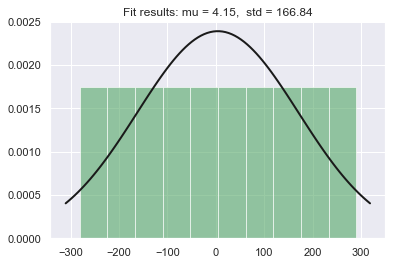

175.3582565189181


In [56]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt



plt.hist(x, bins=10, density=True, alpha=0.6, color='g')
mu, std = norm.fit(x)

print(std)
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

print(scipy.stats.norm.ppf(.98,std,mu))
#print(scipy.stats.norm(mu, std).pdf(4.5))

In [6]:
data_file_path = "data/generated_data1.csv"
data_set = pd.read_csv(data_file_path)
selected_sample = 2000

chosen_idx = np.random.choice(selected_sample, replace=False, size=selected_sample)
df_trimmed = data_set.iloc[chosen_idx]
print(df_trimmed.describe())



        Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
count  2000.000000   2000.000000     2000.000000       2000.000000   
mean    999.500000    999.500000      999.500000        999.500000   
std     577.494589    577.494589      577.494589        577.494589   
min       0.000000      0.000000        0.000000          0.000000   
25%     499.750000    499.750000      499.750000        499.750000   
50%     999.500000    999.500000      999.500000        999.500000   
75%    1499.250000   1499.250000     1499.250000       1499.250000   
max    1999.000000   1999.000000     1999.000000       1999.000000   

            Width       Height       Roi.X1       Roi.Y1       Roi.X2  \
count  2000.00000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     47.22250    47.860000     5.815500     5.839000    41.774000   
std      20.09308    20.268147     1.139346     1.160928    19.215164   
min      25.00000    26.000000     5.000000     5.000000    20.000000   
25% 